# Импорт нужных библиотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
import datetime

# Обучаем нашу модель на данных из train.xlsx

In [ ]:
# Тренировка
df_train = pd.read_excel('train.xlsx')

df_train.head(30)

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
5,5,20230904-7491-218448208,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),2023-08-15 07:48:35,2023-08-18 23:42:52,2023-09-04 15:00:00,4,2023-09-08 12:00:00,Официальный сайт,Отмена,Номер «Стандарт»,3,3
6,6,20220218-7492-124990127,1,7650.0,0,Гарантия банковской картой,2022-02-15 19:17:08,2022-02-17 20:38:50,2022-02-18 15:00:00,1,2022-02-19 12:00:00,booking.com,Отмена,Номер «Стандарт»,1,2
7,7,20230921-7491-221547353,1,26200.0,0,Внешняя система оплаты (Оплата наличными),2023-08-29 16:57:36,NaT,2023-09-21 15:00:00,2,2023-09-23 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,2,3
8,8,20230625-7491-204432766,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,2023-06-12 15:03:17,2023-06-12 15:53:13,2023-06-25 15:00:00,1,2023-06-26 12:00:00,Официальный сайт,Отмена,Номер «Стандарт»,2,3
9,9,20240122-6634-234004847,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),2023-11-01 15:24:22,NaT,2024-01-26 15:00:00,1,2024-01-27 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          26174 non-null  int64         
 1   № брони             26174 non-null  object        
 2   Номеров             26174 non-null  int64         
 3   Стоимость           26174 non-null  float64       
 4   Внесена предоплата  26174 non-null  int64         
 5   Способ оплаты       26174 non-null  object        
 6   Дата бронирования   26174 non-null  datetime64[ns]
 7   Дата отмены         5192 non-null   datetime64[ns]
 8   Заезд               26174 non-null  datetime64[ns]
 9   Ночей               26174 non-null  int64         
 10  Выезд               26174 non-null  datetime64[ns]
 11  Источник            26174 non-null  object        
 12  Статус брони        26174 non-null  object        
 13  Категория номера    26174 non-null  object    

In [ ]:
# Добавляем месяца заезда, выезда и бронирования
df_train['Месяц заезда'] = df_train['Заезд'].dt.month
df_train['Месяц выезда'] = df_train['Выезд'].dt.month
df_train['Месяц бронирования'] = df_train['Дата бронирования'].dt.month

# Проверка
print(df_train[['Месяц заезда', 'Заезд', 'Месяц выезда', 'Выезд', 'Месяц бронирования', 'Дата бронирования']])
print(df_train[['Месяц заезда', 'Заезд', 'Месяц выезда', 'Выезд', 'Месяц бронирования', 'Дата бронирования']].info())

       Месяц заезда               Заезд  Месяц выезда               Выезд  \
0                 4 2023-04-28 15:00:00             5 2023-05-01 12:00:00   
1                 7 2022-07-11 15:00:00             7 2022-07-13 12:00:00   
2                12 2022-12-04 15:00:00            12 2022-12-06 12:00:00   
3                 9 2023-09-18 15:00:00             9 2023-09-19 12:00:00   
4                 5 2023-05-29 15:00:00             5 2023-05-31 12:00:00   
...             ...                 ...           ...                 ...   
26169             3 2023-03-10 15:00:00             3 2023-03-12 12:00:00   
26170             6 2023-06-25 15:00:00             6 2023-06-28 12:00:00   
26171             6 2022-06-24 15:00:00             6 2022-06-28 12:00:00   
26172             4 2022-04-27 15:00:00             4 2022-04-28 12:00:00   
26173             8 2022-08-16 15:00:00             8 2022-08-17 12:00:00   

       Месяц бронирования   Дата бронирования  
0                       4 2

In [ ]:
# Процент предоплаты
df_train['Процент предоплаты'] = df_train['Внесена предоплата'] / df_train['Стоимость']
print(df_train[['Процент предоплаты', 'Внесена предоплата', 'Стоимость']])

       Процент предоплаты  Внесена предоплата  Стоимость
0                0.000000                   0    25700.0
1                0.500000               12400    24800.0
2                0.500000               12900    25800.0
3                0.000000                   0    10500.0
4                1.000000               28690    28690.0
...                   ...                 ...        ...
26169            0.500000                9120    18240.0
26170            0.333333               23200    69600.0
26171            0.250000               13900    55600.0
26172            0.000000                   0     6300.0
26173            1.000000               24600    24600.0

[26174 rows x 3 columns]


In [ ]:
# СВО
df_train['Влияние СВО'] = ((df_train['Дата бронирования'] <= pd.to_datetime('2022-02-24 05:00:00')) & (df_train['Заезд'] >= pd.to_datetime('2022-02-24 05:00:00'))).astype(int)

print(df_train['Влияние СВО'].describe())

count    26174.000000
mean         0.026897
std          0.161785
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Влияние СВО, dtype: float64


In [ ]:
# Мобилизация
df_train['Влияние мобилизации'] = ((df_train['Дата бронирования'] <= pd.to_datetime('2022-09-21 09:20:00')) & (df_train['Заезд'] >= pd.to_datetime('2022-09-21 09:20:00'))).astype(int)

print(df_train['Влияние мобилизации'].describe())

count    26174.000000
mean         0.033927
std          0.181044
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Влияние мобилизации, dtype: float64


In [ ]:
# Отложенная электронная оплата

df_train['Отложенная электронная оплата'] = df_train['Способ оплаты'].apply(lambda x: 1 if x == 'Отложенная электронная оплата: Банк Россия (банк. карта)' else 0)
print(df_train['Отложенная электронная оплата'].describe())

count    26174.000000
mean         0.157714
std          0.364479
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Отложенная электронная оплата, dtype: float64


In [ ]:
# Внешняя система оплаты
df_train['Внешняя система оплаты'] = df_train['Способ оплаты'].apply(lambda x: 1 if x == 'Внешняя система оплаты' else 0)
print(df_train['Внешняя система оплаты'].describe())

count    26174.000000
mean         0.012684
std          0.111910
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Внешняя система оплаты, dtype: float64


In [ ]:
# Пригожин на конечках
df_train['Влияние Женечка'] = ((df_train['Дата бронирования'] <= pd.to_datetime('2023-06-23 09:20:00')) & (df_train['Заезд'] >= pd.to_datetime('2023-06-23 09:20:00'))).astype(int)

print(df_train['Влияние Женечка'].describe())

count    26174.000000
mean         0.052686
std          0.223410
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Влияние Женечка, dtype: float64


In [ ]:
# Предусмотрен для маломобильных

df_train['Предусмотрен для маломобильных'] = df_train['Гостиница'].apply(lambda x: 1 if x == 1 else 0)
print(df_train['Предусмотрен для маломобильных'])

0        1
1        1
2        0
3        0
4        1
        ..
26169    0
26170    0
26171    0
26172    0
26173    1
Name: Предусмотрен для маломобильных, Length: 26174, dtype: int64


In [ ]:
# Способ оплаты
df_train['Способ оплаты'] = df_train['Способ оплаты'].replace(
    ['Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
     'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)'],
    'Банк. карта [Кешбэк. МИР]')
print(df_train['Способ оплаты'])

0                                   Внешняя система оплаты
1        Отложенная электронная оплата: Банк Россия (ба...
2                   Банк. карта: Банк Россия (банк. карта)
3                   Внешняя система оплаты (С предоплатой)
4        Система быстрых платежей: Эквайринг ComfortBoo...
                               ...                        
26169               Банк. карта: Банк Россия (банк. карта)
26170               Банк. карта: Банк Россия (банк. карта)
26171               Банк. карта: Банк Россия (банк. карта)
26172                           Гарантия банковской картой
26173               Банк. карта: Банк Россия (банк. карта)
Name: Способ оплаты, Length: 26174, dtype: object


In [ ]:
incident_str = ['24-02-2022', '21-09-2022', '23-06-2023', '06-08-2024']
incident = [datetime.datetime.strptime(date, '%d-%m-%Y').date() for date in incident_str]

df_train['Инцидент'] = np.where((df_train['Влияние СВО']==1) | (df_train['Влияние мобилизации']==1) | (df_train['Влияние Женечка']==1), 1, 0)

print(df_train['Инцидент'].describe())

count    26174.000000
mean         0.113471
std          0.317174
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Инцидент, dtype: float64


In [ ]:
# Возможность предоплаты
def f(x):
  lst = ['Внешняя система оплаты (Банковская карта)',
         'Внешняя система оплаты (Оплата наличными)',
         'Гарантия банковской картой',
         'При заселении']
  if x in lst:
    return 0
  return 1



df_train['Возможность предоплаты'] = df_train['Способ оплаты'].apply(f)
print(df_train['Возможность предоплаты'].describe())

count    26174.000000
mean         0.934935
std          0.246644
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Возможность предоплаты, dtype: float64


In [ ]:
# Разница между датой бронирования и датой заезда
df_train['Разница бронирования и заезда'] = (df_train['Заезд'] - df_train['Дата бронирования']).dt.days + 1
print(df_train['Разница бронирования и заезда'])

0         8
1        24
2        20
3        10
4         9
         ..
26169    62
26170     5
26171    47
26172    68
26173     3
Name: Разница бронирования и заезда, Length: 26174, dtype: int64


In [ ]:
# Разница между датой заеда и датой выезда
df_train['Разница заезда и выезда'] = (df_train['Выезд'] - df_train['Заезд']).dt.days + 1
print(df_train['Разница заезда и выезда'])

0        3
1        2
2        2
3        1
4        2
        ..
26169    2
26170    3
26171    4
26172    1
26173    1
Name: Разница заезда и выезда, Length: 26174, dtype: int64


,Цена за ночь
0,8566.666667
1,12400.000000
2,12900.000000
3,10500.000000
4,14345.000000
...,...
26169,9120.000000
26170,23200.000000
26171,13900.000000
26172,6300.000000


<ipython-input-87-bbce5b29e5b9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Цена за ночь'])


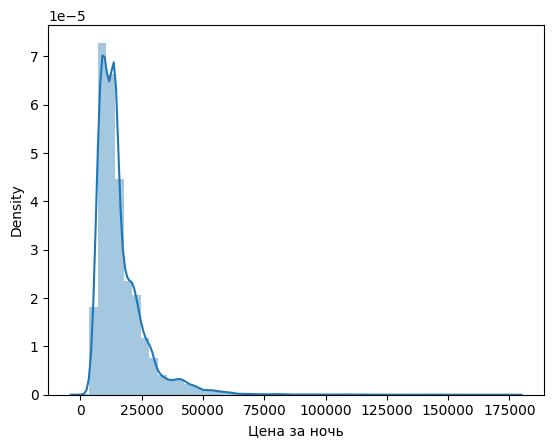

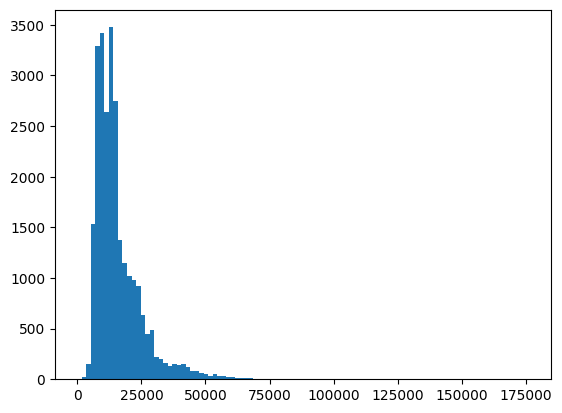

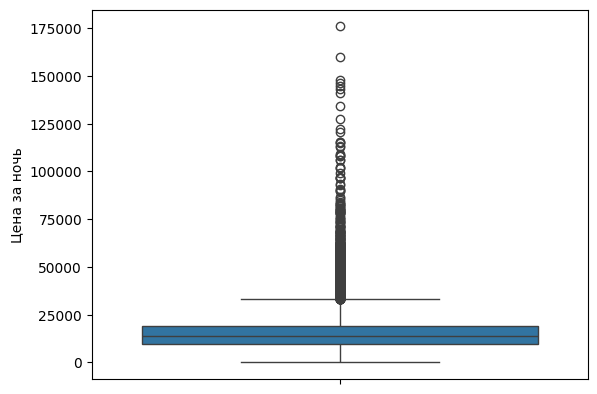

In [ ]:
# Стоимость за ночь, для определения категория гостиницы

df_train['Цена за ночь'] = df_train['Стоимость'] / df_train['Ночей']

display(df_train['Цена за ночь'])

sns.distplot(df_train['Цена за ночь'])
plt.show()
plt.hist(df_train['Цена за ночь'], bins = 100)
plt.show()
sns.boxplot(df_train['Цена за ночь'])
plt.show()

In [ ]:
# Выходные и праздники
df_train['Выходной'] = df_train['Заезд'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
holidays = pd.to_datetime(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-02-23', '2022-03-07', '2022-03-08', '2022-05-02', '2022-05-03',
                           '2022-05-09', '2022-05-10', '2022-06-13', '2022-11-04', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-02-23',
                           '2023-02-24', '2023-03-08', '2023-05-01', '2023-05-08', '2023-05-09', '2023-06-12', '2023-11-06']).date
df_train['Праздник'] = df_train['Заезд'].dt.date.isin(holidays).astype(int)
print(df_train[['Выходной', 'Праздник', 'Заезд']])

       Выходной  Праздник               Заезд
0             0         0 2023-04-28 15:00:00
1             0         0 2022-07-11 15:00:00
2             1         0 2022-12-04 15:00:00
3             0         0 2023-09-18 15:00:00
4             0         0 2023-05-29 15:00:00
...         ...       ...                 ...
26169         0         0 2023-03-10 15:00:00
26170         1         0 2023-06-25 15:00:00
26171         0         0 2022-06-24 15:00:00
26172         0         0 2022-04-27 15:00:00
26173         0         0 2022-08-16 15:00:00

[26174 rows x 3 columns]


In [ ]:
# Превращение даты отмены в 0/1
df_train['ДОП'] = df_train['Дата отмены'].copy()

def assign_num(row):
  if not pd.isna(row['Дата отмены']):
    row['Дата отмены'] = 1
  else:
    row['Дата отмены'] = 0

  return row['Дата отмены']


df_train['Дата отмены'] = df_train.apply(assign_num, axis = 1)
print(df_train['Дата отмены'])

0        1
1        0
2        0
3        0
4        0
        ..
26169    0
26170    0
26171    0
26172    1
26173    0
Name: Дата отмены, Length: 26174, dtype: int64


In [ ]:
# Время суток бронирования
df_train['Час бронирования'] = df_train['Дата бронирования'].dt.hour

def assign_time_of_day(row):
    hour = row['Час бронирования']

    if 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    elif 18 <= hour < 24:
        return 'Вечер'
    else:
        return 'Ночь'

df_train['Час бронирования'] = df_train['Дата бронирования'].dt.hour

df_train['Время суток бронирования'] = df_train.apply(assign_time_of_day, axis=1)

print(df_train['Время суток бронирования'])

0        Вечер
1         День
2        Вечер
3         День
4        Вечер
         ...  
26169     День
26170     День
26171    Вечер
26172     Утро
26173    Вечер
Name: Время суток бронирования, Length: 26174, dtype: object


In [ ]:
# Присовение номера региона

def assign_reg(row):
  if row['Гостиница'] == 1 or row['Гостиница'] == 2:
    row['Регион'] = 'Москва'
  else:
    row['Регион'] = 'Питер'

  return row['Регион']

df_train['Регион'] = df_train.apply(assign_reg, axis = 1)
print(df_train['Регион'])

0        Москва
1        Москва
2         Питер
3         Питер
4        Москва
          ...  
26169    Москва
26170     Питер
26171    Москва
26172     Питер
26173    Москва
Name: Регион, Length: 26174, dtype: object


# **Бабосики**

In [ ]:
#Добавляем курс доллара к дате бронирования

#Получаем данные
url = 'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=31/12/2021&date_req2=15/01/2024&VAL_NM_RQ=R01235'
usd_df = pd.read_xml(url)[['Date', 'Value']]
usd_dict = dict(zip(usd_df['Date'], usd_df['Value']))


# Функция для дополнения словаря (ебало фильтруем)
def fill_missing_dates(rates, start_date, end_date):
    current_date = start_date
    filled_rates = {}
    last_value = None

    while current_date <= end_date:
        date_str = current_date.strftime('%d.%m.%Y')

        if date_str in rates:
            last_value = rates[date_str]
            filled_rates[date_str] = last_value
        else:
            # Заполняем отсутствующую дату последним известным значением
            if last_value is not None:
                filled_rates[date_str] = last_value

        # Переход к следующему дню
        current_date += datetime.timedelta(days=1)

    return filled_rates

start_date = datetime.datetime.strptime('31.12.2021', '%d.%m.%Y')
end_date = datetime.datetime.strptime('10.01.2024', '%d.%m.%Y')

# Заполняем пропуски
completed_rates = fill_missing_dates(usd_dict, start_date, end_date)

#Выводим результат
# for date, value in completed_rates.items():
#     print(f"{date}: {value}")

print(len(completed_rates))

741


In [ ]:
#Добавляем столбец
df_train['Дата бронирования (д.м.г)'] = pd.to_datetime(df_train['Дата бронирования'], format='%Y-%m-%d').dt.date
completed_rates_df = pd.DataFrame(list(completed_rates.items()), columns=['Дата бронирования (д.м.г)', 'Курс $ на дату бронирования'])
completed_rates_df['Дата бронирования (д.м.г)'] = pd.to_datetime(completed_rates_df['Дата бронирования (д.м.г)']).dt.date

df_train = pd.merge(df_train, completed_rates_df, on='Дата бронирования (д.м.г)', how='left')
#df_train.drop('Курс $ на дату бронирования_y', axis=1, inplace=True)
df_train.head()

<ipython-input-93-058a8baeb8fb>:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  completed_rates_df['Дата бронирования (д.м.г)'] = pd.to_datetime(completed_rates_df['Дата бронирования (д.м.г)']).dt.date


,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,...,Разница заезда и выезда,Цена за ночь,Выходной,Праздник,ДОП,Час бронирования,Время суток бронирования,Регион,Дата бронирования (д.м.г),Курс $ на дату бронирования
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,...,3,8566.666667,0,0,2023-04-20 20:39:15,20,Вечер,Москва,2023-04-20,"81,6549"
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,...,2,12400.000000,0,0,NaT,14,День,Москва,2022-06-18,"56,7101"
2,2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,...,2,12900.000000,1,0,NaT,22,Вечер,Питер,2022-11-14,"60,2179"
3,3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,...,1,10500.000000,0,0,NaT,15,День,Питер,2023-09-08,"98,1961"
4,4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,...,2,14345.000000,0,0,NaT,19,Вечер,Москва,2023-05-20,"79,9093"


In [ ]:
# Добавляем ключевую ставку и инфляцию
# Дебоширим данные по к.ставке и инфляции
key_rate = [8.5, 8.5, 20, 17, 14, 9.5, 8, 8, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 9.5, 13, 13, 15, 15]
inflation = [8.73, 9.15, 16.69, 17.83, 17.1, 15.9, 15.1, 14.3, 13.68, 12.63, 11.98, 11.94, 11.77, 10.99, 3.51, 2.51, 3.25, 4.3, 5.15, 6, 6.69, 7.48, 7.42]

dates = []
for i in [2022, 2023]:
    for j in range(1, 13):
        dates.append(datetime.date(i, j, 1))

key_rate_dict = dict(zip(dates, key_rate))
inflation_dict = dict(zip(dates, inflation))

key_rate_df = pd.DataFrame(list(key_rate_dict.items()), columns=['Дата', 'Ключевая ставка в момент бронирования'])
key_rate_df['Месяц бронирования'] = pd.to_datetime(key_rate_df['Дата']).dt.month
key_rate_df['Год бронирования'] = pd.to_datetime(key_rate_df['Дата']).dt.year
#skey_rate_df.drop('Дата', axis=1, inplace=True)

inflation_df = pd.DataFrame(list(inflation_dict.items()), columns=['Дата', 'Инфляция в момент бронирования'])
inflation_df['Месяц бронирования'] = pd.to_datetime(inflation_df['Дата']).dt.month
inflation_df['Год бронирования'] = pd.to_datetime(inflation_df['Дата']).dt.year
inflation_df.drop('Дата', axis=1, inplace=True)

inflation_df.head(3)

,Инфляция в момент бронирования,Месяц бронирования,Год бронирования
0,8.73,1,2022
1,9.15,2,2022
2,16.69,3,2022


In [ ]:
#Добавляем созрелого к нам

df_train['Месяц бронирования'] = pd.to_datetime(df_train['Дата бронирования (д.м.г)']).dt.month
df_train['Год бронирования'] = pd.to_datetime(df_train['Дата бронирования (д.м.г)']).dt.year

df_train = pd.merge(df_train, key_rate_df, on=['Месяц бронирования', 'Год бронирования'], how='left')
df_train = pd.merge(df_train, inflation_df, on=['Месяц бронирования', 'Год бронирования'], how='left')

df_train['Инфляция в момент бронирования'] = df_train['Инфляция в момент бронирования'].fillna(df_train['Инфляция в момент бронирования'].mean())

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             26174 non-null  int64         
 1   № брони                                26174 non-null  object        
 2   Номеров                                26174 non-null  int64         
 3   Стоимость                              26174 non-null  float64       
 4   Внесена предоплата                     26174 non-null  int64         
 5   Способ оплаты                          26174 non-null  object        
 6   Дата бронирования                      26174 non-null  datetime64[ns]
 7   Дата отмены                            26174 non-null  int64         
 8   Заезд                                  26174 non-null  datetime64[ns]
 9   Ночей                                  26174 non-null  int64 

In [ ]:
#На подчистить если нужно

#df_train.drop('Инфляция в момент бронирования', axis=1, inplace=True)

In [ ]:
# Добавляем Погоду в МСК
conditions_msk_str = ['19-02-2022', '05-03-2022', '27-03-2022', '28-03-2022', '31-03-2022', '02-04-2022', '21-04-2022', '24-04-2022', '31-05-2022', '05-07-2022', '02-09-2022', '06-09-2022' ,'07-09-2022', '14-09-2022', '15-09-2022', '18-09-2022', '19-09-2022', '24-09-2022', '25-09-2022', '04-10-2022', '18-10-2022', '12-11-2022', '15-11-2022', '18-11-2022', '22-11-2022', '03-12-2022', '07-12-2022', '09-01-2023', '12-02-2023', '12-03-2023', '13-03-2023', '29-03-2023', '28-04-2023', '11-05-2023', '28-05-2023', '29-06-2023', '13-07-2023', '18-07-2023', '24-07-2023', '26-07-2023', '28-07-2023', '29-07-2023', '12-08-2023', '13-08-2023', '18-08-2023', '20-08-2023', '02-09-2023', '06-10-2023', '07-10-2023', '08-10-2023', '12-10-2023', '16-10-2023', '19-10-2023', '23-10-2023', '27-10-2023', '30-10-2023', '06-11-2023', '19-11-2023', '20-11-2023', '22-11-2023', '23-11-2023', '24-11-2023', '25-11-2023', '07-12-2023']
conditions_msk = [datetime.datetime.strptime(date, '%d-%m-%Y').date() for date in conditions_msk_str]

df_train['Дата заезда'] = pd.to_datetime(df_train['Заезд'], format='%Y-%m-%d').dt.date
df_train['Плохая погода МСК (для 1 и 2)'] = np.where((df_train['Дата заезда'].isin(conditions_msk)) & (df_train['Гостиница'].isin([1,2])), 1, 0)
df_train['Плохая погода МСК (для 3 и 4)'] = np.where((df_train['Дата заезда'].isin(conditions_msk)) & (df_train['Гостиница'].isin([3,4])), 1, 0)

# Добавляем Погоду в СПБ
conditions_spb_str = ['03-01-2022', '08-01-2022', '22-01-2022', '30-01-2022', '31-01-2022', '02-02-2022', '09-02-2022', '18-02-2022', '22-02-2022', '26-03-2022', '28-03-2022', '06-04-2022', '25-04-2022', '12-05-2022', '14-06-2022', '19-06-2022', '05-07-2022', '11-07-2022', '12-07-2022', '14-07-2022', '23-07-2022', '31-07-2022', '01-08-2022', '02-08-2022', '06-08-2022', '25-08-2022', '30-08-2022', '31-08-2022', '01-09-2022', '16-09-2022', '19-09-2022', '29-10-2022', '01-11-2022', '04-12-2022', '06-12-2022', '07-12-2022', '05-01-2023', '01-01-2023', '23-02-2023', '05-03-2023', '06-03-2023', '11-03-2023', '27-03-2023', '29-03-2023', '31-03-2023', '01-04-2023', '03-04-2023', '02-05-2023', '22-05-2023', '22-06-2023', '25-06-2023', '26-06-2023', '28-06-2023', '01-07-2023', '02-07-2023', '03-07-2023', '17-07-2023', '28-07-2023', '02-08-2023', '04-08-2023', '08-08-2023', '17-08-2023', '31-08-2023', '01-09-2023', '14-09-2023', '24-09-2023', '03-10-2023', '04-10-2023', '07-10-2023', '11-10-2023', '12-10-2023', '14-10-2023', '23-11-2023', '24-11-2023', '25-11-2023', '27-11-2023', '28-11-2023', '30-11-2023', '09-12-2023']
conditions_spb = [datetime.datetime.strptime(date, '%d-%m-%Y').date() for date in conditions_msk_str]

df_train['Плохая погода СПБ (для 1 и 2)'] = np.where((df_train['Дата заезда'].isin(conditions_spb)) & (df_train['Гостиница'].isin([1,2])), 1, 0)
df_train['Плохая погода СПБ (для 3 и 4)'] = np.where((df_train['Дата заезда'].isin(conditions_spb)) & (df_train['Гостиница'].isin([3,4])), 1, 0)

df_train.head(3)

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,...,Курс $ на дату бронирования,Год бронирования,Дата,Ключевая ставка в момент бронирования,Инфляция в момент бронирования,Дата заезда,Плохая погода МСК (для 1 и 2),Плохая погода МСК (для 3 и 4),Плохая погода СПБ (для 1 и 2),Плохая погода СПБ (для 3 и 4)
0,0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,...,"81,6549",2023,2023-04-01,7.5,2.51,2023-04-28,1,0,1,0
1,1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,...,"56,7101",2022,2022-06-01,9.5,15.90,2022-07-11,0,0,0,0
2,2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,...,"60,2179",2022,2022-11-01,7.5,11.98,2022-12-04,0,0,0,0


In [ ]:
'''# Разница между датой брони и датой отказа

print(df_train['ДОП'])
df_train['ДОП'] = df_train['ДОП'].fillna('2999-12-30 20:30:40')
df_train['ДОП'] = pd.to_datetime(df_train['ДОП'])
df_train['Разница между бронированием и отказом'] = (df_train['ДОП'] - df_train['Дата бронирования']).dt.days

print(df_train['Разница между бронированием и отказом'].describe())
'''
df_train.drop(columns = ['ДОП'], inplace = True)

In [ ]:
# Добавим координаты отлей

def assign_coords(row):
  if row['Гостиница'] == 1:
    row['Координаты отеля'] = '55.729284, 37.644038'
  elif row['Гостиница'] == 2:
    row['Координаты отеля'] = '55.822244, 37.645728'
  elif row['Гостиница'] == 3:
    row['Координаты отеля'] = '59.913576, 30.320653'
  elif row['Гостиница'] == 4:
    row['Координаты отеля'] = '59.932356, 30.348450'

  return row['Координаты отеля']


def assign_metro(row):
  if row['Гостиница'] == 1:
    row['Расстояние до метро'] = '55.731326, 37.636255'
  elif row['Гостиница'] == 2:
    row['Расстояние до метро'] = '55.822453, 37.641593'
  elif row['Гостиница'] == 3:
    row['Расстояние до метро'] = '59.916323, 30.318295'
  elif row['Гостиница'] == 4:
    row['Расстояние до метро'] = '59.931448, 30.355210'

  return row['Расстояние до метро']

def parse_coords(coords):
    lat, lon = map(float, coords.split(', '))
    return lat, lon


def calculate_distance(row):

    hotel_lat, hotel_lon = parse_coords(row['Координаты отеля'])

    metro_lat, metro_lon = parse_coords(row['Расстояние до метро'])

    distance = np.sqrt((hotel_lat - metro_lat)**2 + (hotel_lon - metro_lon)**2)

    return distance

df_train['Координаты отеля'] = df_train.apply(assign_coords, axis = 1)
df_train['Расстояние до метро'] = df_train.apply(assign_metro, axis = 1)
df_train['Расстояние до метро (евклид)'] = df_train.apply(calculate_distance, axis=1)

print(df_train[['Координаты отеля', 'Расстояние до метро', 'Расстояние до метро (евклид)']].head())


       Координаты отеля   Расстояние до метро  Расстояние до метро (евклид)
0  55.729284, 37.644038  55.731326, 37.636255                      0.008046
1  55.729284, 37.644038  55.731326, 37.636255                      0.008046
2  59.932356, 30.348450  59.931448, 30.355210                      0.006821
3  59.913576, 30.320653  59.916323, 30.318295                      0.003620
4  55.729284, 37.644038  55.731326, 37.636255                      0.008046


In [ ]:
# ЗП в регионе

df_train['Средняя ЗП'] = 0

def assign_zp_region(row):
  if row['Регион'] == 'Москва':
    row['Средняя ЗП'] = 86494
  elif row['Регион'] == 'Питер':
    row['Средняя ЗП'] = 76032
  return row['Средняя ЗП']


df_train['Средняя ЗП'] = df_train.apply(assign_zp_region, axis = 1)
print(df_train['Средняя ЗП'])

0        86494
1        86494
2        76032
3        76032
4        86494
         ...  
26169    86494
26170    76032
26171    86494
26172    76032
26173    86494
Name: Средняя ЗП, Length: 26174, dtype: int64


# Типо всякие графики и инсайты сюда

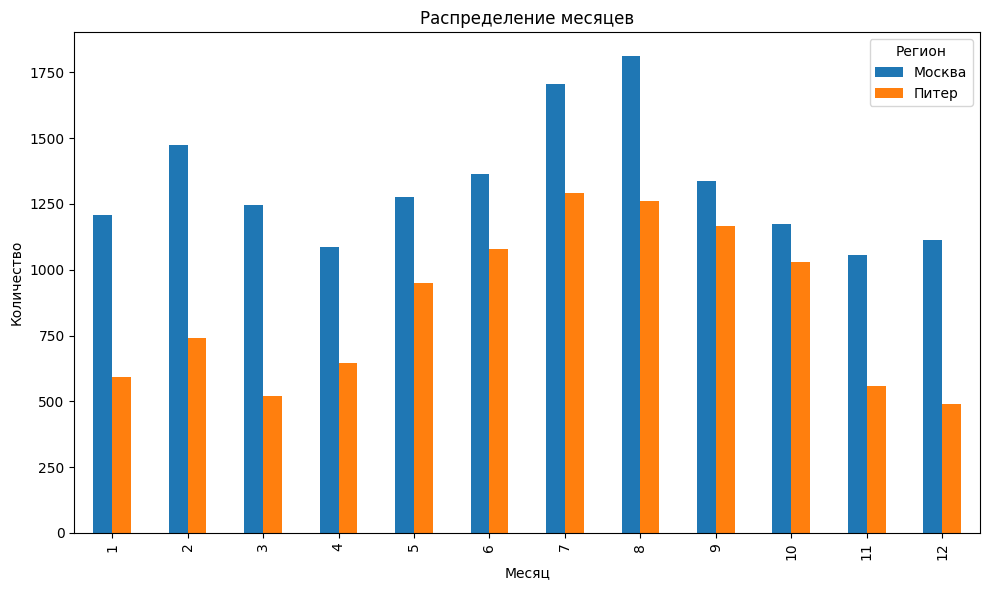

       Месяц бронирования  Регион
0                       4  Москва
1                       6  Москва
2                      11   Питер
3                       9   Питер
4                       5  Москва
...                   ...     ...
26169                   1  Москва
26170                   6   Питер
26171                   5  Москва
26172                   2   Питер
26173                   8  Москва

[26174 rows x 2 columns]


In [ ]:
grouped_data = df_train[['Регион', 'Месяц заезда']].groupby(['Регион', 'Месяц заезда']).size().reset_index(name='Количество')

pivot_table = grouped_data.pivot(index='Месяц заезда', columns='Регион', values='Количество').fillna(0)

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение месяцев')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

print(df_train[['Месяц бронирования', 'Регион']])

Источник
Официальный сайт              21077
Бронирование из экстранета     1306
Яндекс.Путешествия             1132
booking.com                     834
ostrovok.ru                     733
Программа лояльности            618
Bronevik.com                    141
OneTwoTrip                      141
Acase.ru                         37
Alean.ru                         35
Cuva                             34
Zabroniryi.ru                    24
Bronevik.com/Bro.Online          21
101hotels.com                    16
ВКонтакте                         8
expedia.com                       5
Тинькофф Путешествия              4
Ozon                              4
Otello                            3
Svoy Hotel                        1
Name: count, dtype: int64


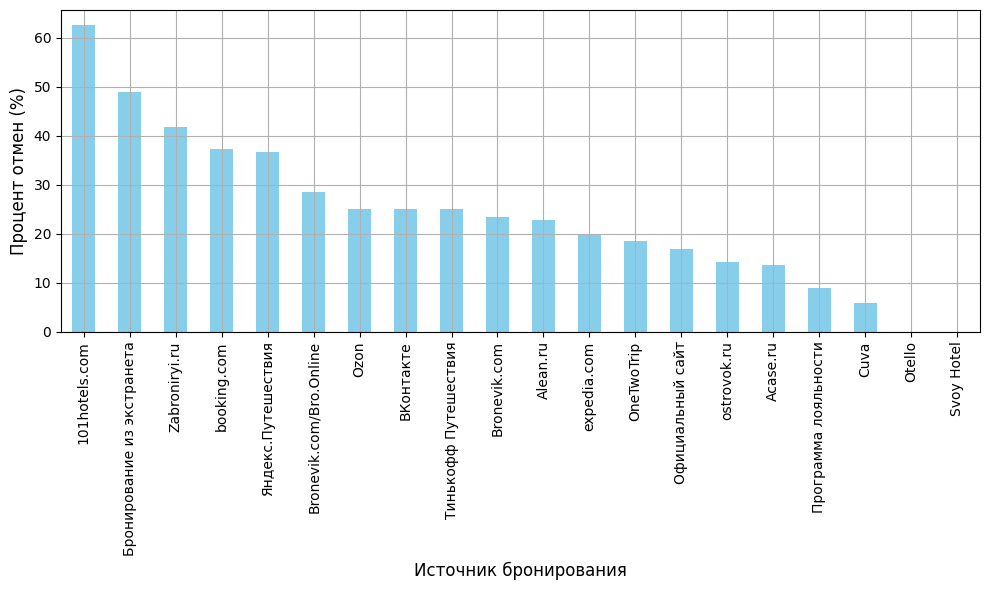

In [ ]:
import re

# Функция для сокращения текста до первого вхождения скобок
def replace_ist(source):
    return re.sub(r'\s*\(.*\)', '', source)

# Применение функции к столбцу "Источник"
df_train['Источник'] = df_train['Источник'].apply(replace_ist)

# Проверка результата
print(df_train['Источник'].value_counts())

cancel_rate = df_train.groupby('Источник')['Дата отмены'].mean() * 100

# Построение графика
plt.figure(figsize=(10, 6))
cancel_rate.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Процент отмен (%)', fontsize=12)
plt.xlabel('Источник бронирования', fontsize=12)

plt.grid(True)
plt.tight_layout()

In [ ]:
print(df_train.groupby('Способ оплаты')['Дата отмены'].mean() * 100)

Способ оплаты
Банк. карта (SberPay): Эквайринг ComfortBooking (Банк. карта) (SberPay)          14.285714
Банк. карта (Yandex Pay): Эквайринг ComfortBooking (Банк. карта) (Yandex Pay)     0.000000
Банк. карта [Кешбэк. МИР]                                                         7.496902
Банк. карта [Кешбэк. МИР]: Эквайринг ComfortBooking (Банк. карта)                17.058824
Банк. карта: Банк Россия (банк. карта)                                            9.994908
Банк. карта: Эквайринг ComfortBooking (Банк. карта)                               8.620690
Внешняя система оплаты                                                           74.698795
Внешняя система оплаты (Банковская карта)                                        42.592593
Внешняя система оплаты (Оплата наличными)                                        36.231884
Внешняя система оплаты (С предоплатой)                                           17.386667
Гарантия банковской картой                                                  

# Обучение модельки на train_xlsx (я могу заняться потом подбором гиперпараметров)

In [ ]:
# Приведение категориальных данных в числовые

for i in df_train.columns:
  if df_train[i].dtype == 'object':
    m = LabelEncoder()
    df_train[i] = m.fit_transform(df_train[i])


display(df_train)
print(df_train.info())

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,...,Инфляция в момент бронирования,Дата заезда,Плохая погода МСК (для 1 и 2),Плохая погода МСК (для 3 и 4),Плохая погода СПБ (для 1 и 2),Плохая погода СПБ (для 3 и 4),Координаты отеля,Расстояние до метро,Расстояние до метро (евклид),Средняя ЗП
0,0,15613,1,25700.0,0,6,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,...,2.51,481,1,0,1,0,0,0,0.008046,86494
1,1,6681,1,24800.0,12400,11,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,...,15.90,190,0,0,0,0,0,0,0.008046,86494
2,2,12003,1,25800.0,12900,4,2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,...,11.98,336,0,0,0,0,3,3,0.006821,76032
3,3,21851,1,10500.0,0,9,2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,...,6.69,624,0,0,0,0,2,2,0.003620,76032
4,4,16677,1,28690.0,28690,13,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,...,3.25,512,0,0,0,0,0,0,0.008046,86494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,26169,14661,1,18240.0,9120,4,2023-01-07 17:45:18,0,2023-03-10 15:00:00,2,...,11.77,432,0,0,0,0,1,1,0.004140,86494
26170,26170,17637,1,69600.0,23200,4,2023-06-20 17:54:17,0,2023-06-25 15:00:00,3,...,4.30,539,0,0,0,0,3,3,0.006821,76032
26171,26171,5904,1,55600.0,13900,4,2022-05-08 19:24:05,0,2022-06-24 15:00:00,4,...,17.10,173,0,0,0,0,1,1,0.004140,86494
26172,26172,3414,1,6300.0,0,10,2022-02-19 09:55:50,1,2022-04-27 15:00:00,1,...,9.15,115,0,0,0,0,2,2,0.003620,76032


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             26174 non-null  int64         
 1   № брони                                26174 non-null  int64         
 2   Номеров                                26174 non-null  int64         
 3   Стоимость                              26174 non-null  float64       
 4   Внесена предоплата                     26174 non-null  int64         
 5   Способ оплаты                          26174 non-null  int64         
 6   Дата бронирования                      26174 non-null  datetime64[ns]
 7   Дата отмены                            26174 non-null  int64         
 8   Заезд                                  26174 non-null  datetime64[ns]
 9   Ночей                                  26174 non-null  int64 

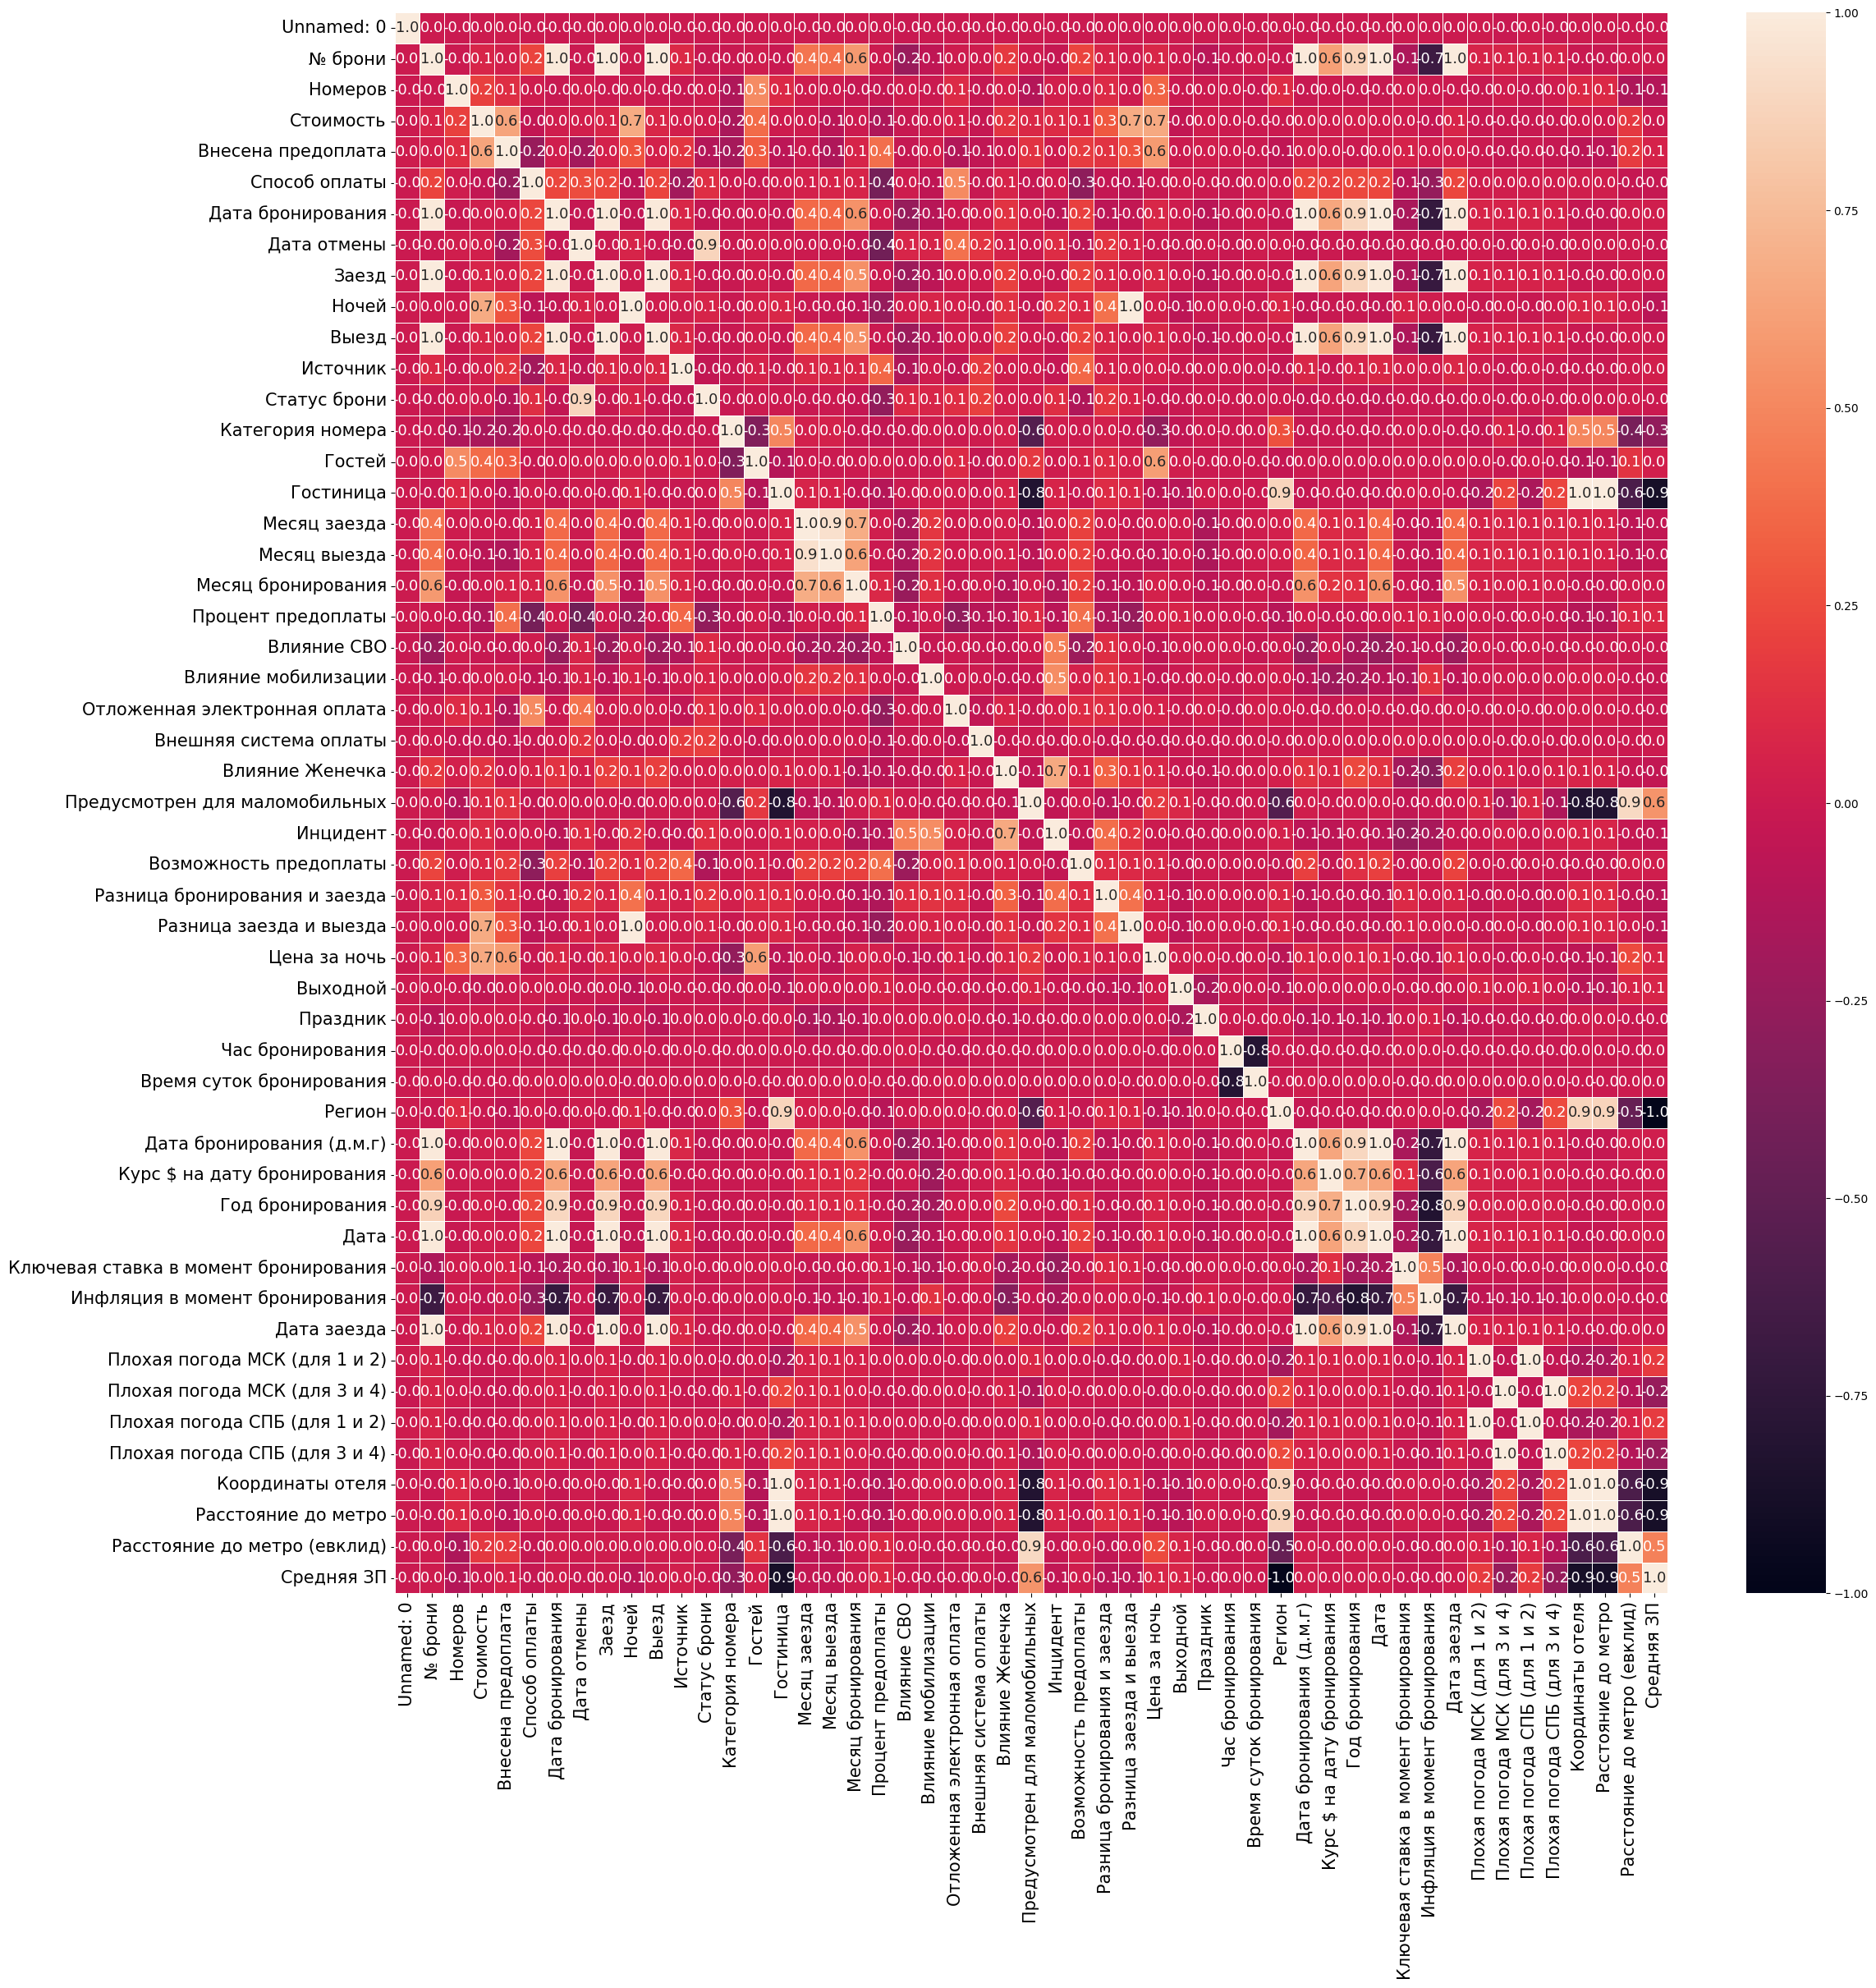

In [ ]:
# Матрица корреляции
df_train_corr = df_train.corr()

plt.figure(figsize = (25, 25))
sns.heatmap(df_train_corr, fmt=".1f", linewidth=.5, annot=True, annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Удаляем столбец 'Статус брони'
X = df_train.drop(columns=['Дата отмены', 'Статус брони']).copy()
features_to_remove = ['Дата', 'Инцидент', 'Плохая погода СПБ (для 1 и 2)', 'Плохая погода СПБ (для 3 и 4)']
X = X.drop(columns=features_to_remove)
# Преобразуем столбцы с датами в числовой формат (например, количество дней с начала эпохи)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)

# Целевая переменная
y = df_train['Дата отмены']

# Выбор 5 лучших фичей с помощью SelectKBest
sel = SelectKBest(score_func=f_classif, k=5)
X_new = sel.fit_transform(X, y)

# Получаем названия выбранных фичей
selected_features = X.columns[sel.get_support()]
X_good = X[selected_features]

print(X_good)


       Внесена предоплата  Способ оплаты  Процент предоплаты  \
0                       0              6            0.000000   
1                   12400             11            0.500000   
2                   12900              4            0.500000   
3                       0              9            0.000000   
4                   28690             13            1.000000   
...                   ...            ...                 ...   
26169                9120              4            0.500000   
26170               23200              4            0.333333   
26171               13900              4            0.250000   
26172                   0             10            0.000000   
26173               24600              4            1.000000   

       Отложенная электронная оплата  Разница бронирования и заезда  
0                                  0                              8  
1                                  1                             24  
2                    

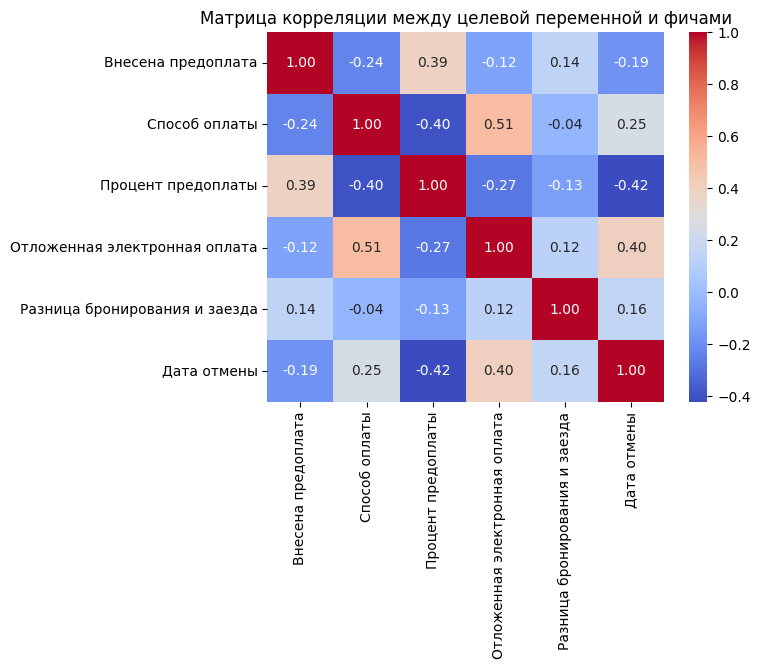

In [ ]:
df_corr = X_good.copy()  # Выбранные признаки
df_corr['Дата отмены'] = y  # Добавляем целевую переменную

# Рассчитываем корреляцию
correlation_matrix = df_corr.corr()

# Отображаем тепловую карту корреляции
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляции между целевой переменной и фичами")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score

# Задать сетку гиперпараметров для поиска
param_grid = {
    'n_estimators': [400],
    'max_depth': [40],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'class_weight': ['balanced']
}

# Инициализируем модель
model = RandomForestClassifier(random_state=42)

# Подбор гиперпараметров через кросс-валидацию
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Обучение модели
grid_search.fit(X_good, y)

print("Лучшие параметры:", grid_search.best_params_)

# Получение лучшей модели
best_model = grid_search.best_estimator_

# Кросс-валидация с лучшей моделью
k = KFold(n_splits=10, shuffle=True, random_state=42)
roc = []

for train_index, test_index in k.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    roc_i = roc_auc_score(y_test, y_pred)
    roc.append(roc_i)

print('roc-auc =', sum(roc) / len(roc))


Лучшие параметры: {'class_weight': 'balanced', 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 400}
roc-auc = 0.7731003782999759


In [ ]:
print(df_train['Дата отмены'].value_counts())

Дата отмены
0    20982
1     5192
Name: count, dtype: int64


# Получаем наши рузльтаты на тесте


In [ ]:
df_test = pd.read_excel('test.xlsx')
print(df_test.head)

<bound method NDFrame.head of        Unnamed: 0                   № брони  Номеров  Стоимость  \
0               0  20231129-16563-238946689        1    23750.0   
1               1   20221219-7491-174959103        1    15010.0   
2               2   20221211-6634-172724329        1     8400.0   
3               3   20230821-6634-212247350        1    42500.0   
4               4   20230326-6634-189784563        1    62500.0   
...           ...                       ...      ...        ...   
11213       11213   20220507-7492-130458541        1    50200.0   
11214       11214   20240217-6634-235901857        1   190100.0   
11215       11215   20220209-6634-124107676        1    42300.0   
11216       11216   20230128-6634-179977236        1    27900.0   
11217       11217  20230409-16563-185703068        1    68000.0   

       Внесена предоплата                                      Способ оплаты  \
0                   23750             Банк. карта: Банк Россия (банк. карта)   
1    

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          11218 non-null  int64         
 1   № брони             11218 non-null  object        
 2   Номеров             11218 non-null  int64         
 3   Стоимость           11218 non-null  float64       
 4   Внесена предоплата  11218 non-null  int64         
 5   Способ оплаты       11218 non-null  object        
 6   Дата бронирования   11218 non-null  datetime64[ns]
 7   Заезд               11218 non-null  datetime64[ns]
 8   Ночей               11218 non-null  int64         
 9   Выезд               11218 non-null  datetime64[ns]
 10  Источник            11218 non-null  object        
 11  Категория номера    11218 non-null  object        
 12  Гостей              11218 non-null  int64         
 13  Гостиница           11218 non-null  int64     

In [ ]:
# Добавляем месяца заезда, выезда и бронирования
df_test['Месяц заезда'] = df_test['Заезд'].dt.month
df_test['Месяц выезда'] = df_test['Выезд'].dt.month
df_test['Месяц бронирования'] = df_test['Дата бронирования'].dt.month

# Чекаем огузок наш (вроде норм)
print(df_test[['Месяц заезда', 'Заезд', 'Месяц выезда', 'Выезд', 'Месяц бронирования', 'Дата бронирования']])
print(df_test[['Месяц заезда', 'Заезд', 'Месяц выезда', 'Выезд', 'Месяц бронирования', 'Дата бронирования']].info())

       Месяц заезда               Заезд  Месяц выезда               Выезд  \
0                11 2023-11-29 15:00:00            12 2023-12-01 12:00:00   
1                12 2022-12-19 15:00:00            12 2022-12-21 12:00:00   
2                12 2022-12-11 15:00:00            12 2022-12-12 12:00:00   
3                 8 2023-08-21 15:00:00             8 2023-08-24 12:00:00   
4                 3 2023-03-26 15:00:00             3 2023-03-31 12:00:00   
...             ...                 ...           ...                 ...   
11213             5 2022-05-07 15:00:00             5 2022-05-09 12:00:00   
11214             2 2024-02-16 15:00:00             2 2024-02-21 12:00:00   
11215             2 2022-02-09 15:00:00             2 2022-02-10 12:00:00   
11216             1 2023-01-28 15:00:00             1 2023-01-29 12:00:00   
11217             4 2023-04-09 15:00:00             4 2023-04-15 12:00:00   

       Месяц бронирования   Дата бронирования  
0                      11 2

In [ ]:
# Процент предоплаты
df_test['Процент предоплаты'] = df_test['Внесена предоплата'] / df_test['Стоимость']
print(df_test[['Процент предоплаты', 'Внесена предоплата', 'Стоимость']])

       Процент предоплаты  Внесена предоплата  Стоимость
0                1.000000               23750    23750.0
1                0.500000                7505    15010.0
2                1.000000                8400     8400.0
3                1.000000               42500    42500.0
4                0.190400               11900    62500.0
...                   ...                 ...        ...
11213            1.000000               50200    50200.0
11214            0.228827               43500   190100.0
11215            1.000000               42300    42300.0
11216            1.000000               27900    27900.0
11217            0.181250               12325    68000.0

[11218 rows x 3 columns]


In [ ]:
# СВО
df_test['Влияние СВО'] = ((df_test['Дата бронирования'] <= pd.to_datetime('2022-02-24 05:00:00')) & (df_test['Заезд'] >= pd.to_datetime('2022-02-24 05:00:00'))).astype(int)

print(df_test['Влияние СВО'].describe())

count    11218.000000
mean         0.029328
std          0.168731
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Влияние СВО, dtype: float64


In [ ]:
# Мобилизация
df_test['Влияние мобилизации'] = ((df_test['Дата бронирования'] <= pd.to_datetime('2022-09-21 09:20:00')) & (df_test['Заезд'] >= pd.to_datetime('2022-09-21 09:20:00'))).astype(int)

print(df_test['Влияние мобилизации'].describe())

count    11218.000000
mean         0.032715
std          0.177898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Влияние мобилизации, dtype: float64


In [ ]:
# Отложенная электронная оплата

df_test['Отложенная электронная оплата'] = df_test['Способ оплаты'].apply(lambda x: 1 if x == 'Отложенная электронная оплата: Банк Россия (банк. карта)' else 0)
print(df_test['Отложенная электронная оплата'].describe())

count    11218.000000
mean         0.154662
std          0.361598
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Отложенная электронная оплата, dtype: float64


In [ ]:
# Внешняя система оплаты
df_test['Внешняя система оплаты'] = df_test['Способ оплаты'].apply(lambda x: 1 if x == 'Внешняя система оплаты' else 0)
print(df_test['Внешняя система оплаты'].describe())

count    11218.000000
mean         0.012569
std          0.111410
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Внешняя система оплаты, dtype: float64


In [ ]:
# Предусмотрен для маломобильных

df_test['Предусмотрен для маломобильных'] = df_train['Гостиница'].apply(lambda x: 1 if x == 1 else 0)
print(df_train['Предусмотрен для маломобильных'])

0        1
1        1
2        0
3        0
4        1
        ..
26169    0
26170    0
26171    0
26172    0
26173    1
Name: Предусмотрен для маломобильных, Length: 26174, dtype: int64


In [ ]:
# Пригожин на конечках
df_test['Влияние Женечка'] = ((df_test['Дата бронирования'] <= pd.to_datetime('2023-06-23 09:20:00')) & (df_test['Заезд'] >= pd.to_datetime('2023-06-23 09:20:00'))).astype(int)

print(df_test['Влияние Женечка'].describe())

count    11218.000000
mean         0.050187
std          0.218341
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Влияние Женечка, dtype: float64


In [ ]:
# Способ оплаты
df_test['Способ оплаты'] = df_test['Способ оплаты'].replace(
    ['Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
     'Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)'],
    'Банк. карта [Кешбэк. МИР]')
print(df_test['Способ оплаты'])

0                   Банк. карта: Банк Россия (банк. карта)
1                   Банк. карта: Банк Россия (банк. карта)
2        Отложенная электронная оплата: Банк Россия (ба...
3                   Банк. карта: Банк Россия (банк. карта)
4        Система быстрых платежей: Эквайринг ComfortBoo...
                               ...                        
11213                            Банк. карта [Кешбэк. МИР]
11214    Система быстрых платежей: Эквайринг ComfortBoo...
11215               Банк. карта: Банк Россия (банк. карта)
11216               Банк. карта: Банк Россия (банк. карта)
11217               Банк. карта: Банк Россия (банк. карта)
Name: Способ оплаты, Length: 11218, dtype: object


In [ ]:
# Возможность предоплаты
def f(x):
  lst = ['Внешняя система оплаты (Банковская карта)',
         'Внешняя система оплаты (Оплата наличными)',
         'Гарантия банковской картой',
         'При заселении']
  if x in lst:
    return 0
  return 1

df_test['Возможность предоплаты'] = df_test['Способ оплаты'].apply(f)
print(df_test['Возможность предоплаты'])

0        1
1        1
2        1
3        1
4        1
        ..
11213    1
11214    1
11215    1
11216    1
11217    1
Name: Возможность предоплаты, Length: 11218, dtype: int64


In [ ]:
# Разница между датой бронирования и датой заезда
df_test['Разница бронирования и заезда'] = (df_test['Заезд'] - df_test['Дата бронирования']).dt.days + 1
print(df_test['Разница бронирования и заезда'])

0         2
1         7
2        16
3        34
4         4
         ..
11213    41
11214    97
11215     1
11216     8
11217    42
Name: Разница бронирования и заезда, Length: 11218, dtype: int64


In [ ]:
# Разница между датой заеда и датой выезда
df_test['Разница заезда и выезда'] = (df_test['Выезд'] - df_test['Заезд']).dt.days + 1
print(df_test['Разница заезда и выезда'])

0        2
1        2
2        1
3        3
4        5
        ..
11213    2
11214    5
11215    1
11216    1
11217    6
Name: Разница заезда и выезда, Length: 11218, dtype: int64


,Цена за ночь
0,11875.000000
1,7505.000000
2,8400.000000
3,14166.666667
4,12500.000000
...,...
11213,25100.000000
11214,38020.000000
11215,42300.000000
11216,27900.000000


<ipython-input-124-79021233e532>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['Цена за ночь'])


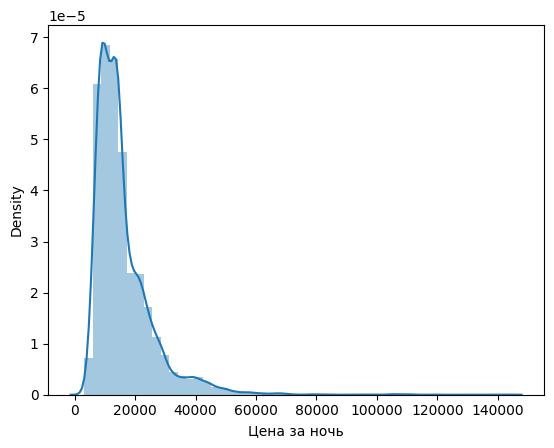

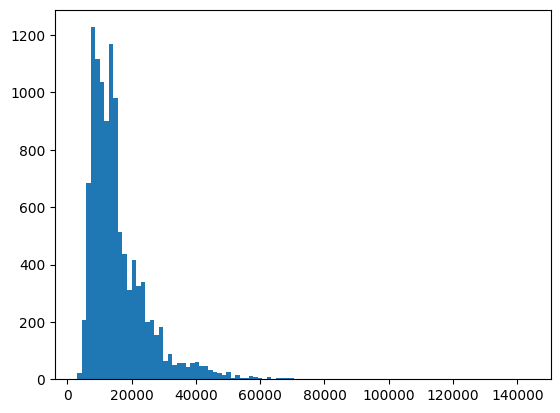

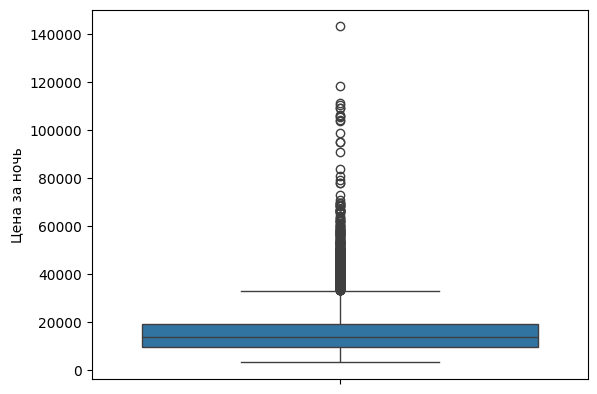

In [ ]:
# Стоимость за ночь, для определения категория гостиницы

df_test['Цена за ночь'] = df_test['Стоимость'] / df_test['Ночей']

display(df_test['Цена за ночь'])

sns.distplot(df_test['Цена за ночь'])
plt.show()
plt.hist(df_test['Цена за ночь'], bins = 100)
plt.show()
sns.boxplot(df_test['Цена за ночь'])
plt.show()

In [ ]:
# Выходные и праздники
df_test['Выходной'] = df_test['Заезд'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
holidays = pd.to_datetime(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-02-23', '2022-03-07', '2022-03-08', '2022-05-02', '2022-05-03',
                           '2022-05-09', '2022-05-10', '2022-06-13', '2022-11-04', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-02-23',
                           '2023-02-24', '2023-03-08', '2023-05-01', '2023-05-08', '2023-05-09', '2023-06-12', '2023-11-06']).date
df_test['Праздник'] = df_test['Заезд'].dt.date.isin(holidays).astype(int)
print(df_test[['Выходной', 'Праздник', 'Заезд']])

       Выходной  Праздник               Заезд
0             0         0 2023-11-29 15:00:00
1             0         0 2022-12-19 15:00:00
2             1         0 2022-12-11 15:00:00
3             0         0 2023-08-21 15:00:00
4             1         0 2023-03-26 15:00:00
...         ...       ...                 ...
11213         1         0 2022-05-07 15:00:00
11214         0         0 2024-02-16 15:00:00
11215         0         0 2022-02-09 15:00:00
11216         1         0 2023-01-28 15:00:00
11217         1         0 2023-04-09 15:00:00

[11218 rows x 3 columns]


In [ ]:
# Время суток бронирования
print(df_test.info())
df_test['Час бронирования'] = df_test['Дата бронирования'].dt.hour

def assign_time_of_day(row):

    hour = row['Час бронирования']

    if 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    elif 18 <= hour < 24:
        return 'Вечер'
    else:
        return 'Ночь'

df_test['Час бронирования'] = df_test['Дата бронирования'].dt.hour

df_test['Время суток бронирования'] = df_test.apply(assign_time_of_day, axis=1)

print(df_test['Время суток бронирования'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      11218 non-null  int64         
 1   № брони                         11218 non-null  object        
 2   Номеров                         11218 non-null  int64         
 3   Стоимость                       11218 non-null  float64       
 4   Внесена предоплата              11218 non-null  int64         
 5   Способ оплаты                   11218 non-null  object        
 6   Дата бронирования               11218 non-null  datetime64[ns]
 7   Заезд                           11218 non-null  datetime64[ns]
 8   Ночей                           11218 non-null  int64         
 9   Выезд                           11218 non-null  datetime64[ns]
 10  Источник                        11218 non-null  object        
 11  Ка

In [ ]:
# Присовение номера региона

def assign_reg(row):
  if row['Гостиница'] == 1 or row['Гостиница'] == 2:
    row['Регион'] = 'Москва'
  else:
    row['Регион'] = 'Питер'

  return row['Регион']

df_test['Регион'] = df_test.apply(assign_reg, axis = 1)
print(df_test['Регион'])

0         Питер
1         Питер
2        Москва
3        Москва
4        Москва
          ...  
11213    Москва
11214    Москва
11215    Москва
11216    Москва
11217     Питер
Name: Регион, Length: 11218, dtype: object


# Денежки в тесте

In [ ]:
#Добавляем курс доллара к дате бронирования

#Получаем данные
url = 'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=31/12/2021&date_req2=15/01/2024&VAL_NM_RQ=R01235'
usd_df = pd.read_xml(url)[['Date', 'Value']]
usd_dict = dict(zip(usd_df['Date'], usd_df['Value']))


# Функция для дополнения словаря (ебало фильтруем)
def fill_missing_dates(rates, start_date, end_date):
    current_date = start_date
    filled_rates = {}
    last_value = None

    while current_date <= end_date:
        date_str = current_date.strftime('%d.%m.%Y')

        if date_str in rates:
            last_value = rates[date_str]
            filled_rates[date_str] = last_value
        else:
            # Заполняем отсутствующую дату последним известным значением
            if last_value is not None:
                filled_rates[date_str] = last_value

        # Переход к следующему дню
        current_date += datetime.timedelta(days=1)

    return filled_rates

start_date = datetime.datetime.strptime('31.12.2021', '%d.%m.%Y')
end_date = datetime.datetime.strptime('10.01.2024', '%d.%m.%Y')

# Заполняем пропуски
completed_rates = fill_missing_dates(usd_dict, start_date, end_date)


print(len(completed_rates))

741


In [ ]:
#Добавляем столбец
df_test['Дата бронирования (д.м.г)'] = pd.to_datetime(df_test['Дата бронирования'], format='%Y-%m-%d').dt.date
completed_rates_df = pd.DataFrame(list(completed_rates.items()), columns=['Дата бронирования (д.м.г)', 'Курс $ на дату бронирования'])
completed_rates_df['Дата бронирования (д.м.г)'] = pd.to_datetime(completed_rates_df['Дата бронирования (д.м.г)']).dt.date

df_test = pd.merge(df_test, completed_rates_df, on='Дата бронирования (д.м.г)', how='left')
#df_train.drop('Курс $ на дату бронирования_y', axis=1, inplace=True)
df_test.head()

<ipython-input-129-95314aebe6f2>:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  completed_rates_df['Дата бронирования (д.м.г)'] = pd.to_datetime(completed_rates_df['Дата бронирования (д.м.г)']).dt.date


,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,...,Разница бронирования и заезда,Разница заезда и выезда,Цена за ночь,Выходной,Праздник,Час бронирования,Время суток бронирования,Регион,Дата бронирования (д.м.г),Курс $ на дату бронирования
0,0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,...,2,2,11875.000000,0,0,10,Утро,Питер,2023-11-28,"88,7045"
1,1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,...,7,2,7505.000000,0,0,18,Вечер,Питер,2022-12-12,"62,3813"
2,2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,...,16,1,8400.000000,1,0,22,Вечер,Москва,2022-11-25,"60,3866"
3,3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,...,34,3,14166.666667,0,0,15,День,Москва,2023-07-18,"90,4217"
4,4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,...,4,5,12500.000000,1,0,11,Утро,Москва,2023-03-23,"76,9561"


In [ ]:
# Добавляем ключевую ставку и инфляцию
# Дебоширим данные по к.ставке и инфляции
key_rate = [8.5, 8.5, 20, 17, 14, 9.5, 8, 8, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 9.5, 13, 13, 15, 15]
inflation = [8.73, 9.15, 16.69, 17.83, 17.1, 15.9, 15.1, 14.3, 13.68, 12.63, 11.98, 11.94, 11.77, 10.99, 3.51, 2.51, 3.25, 4.3, 5.15, 6, 6.69, 7.48, 7.42]

dates = []
for i in [2022, 2023]:
    for j in range(1, 13):
        dates.append(datetime.date(i, j, 1))

key_rate_dict = dict(zip(dates, key_rate))
inflation_dict = dict(zip(dates, inflation))

key_rate_df = pd.DataFrame(list(key_rate_dict.items()), columns=['Дата', 'Ключевая ставка в момент бронирования'])
key_rate_df['Месяц бронирования'] = pd.to_datetime(key_rate_df['Дата']).dt.month
key_rate_df['Год бронирования'] = pd.to_datetime(key_rate_df['Дата']).dt.year
key_rate_df.drop('Дата', axis=1, inplace=True)

inflation_df = pd.DataFrame(list(inflation_dict.items()), columns=['Дата', 'Инфляция в момент бронирования'])
inflation_df['Месяц бронирования'] = pd.to_datetime(inflation_df['Дата']).dt.month
inflation_df['Год бронирования'] = pd.to_datetime(inflation_df['Дата']).dt.year
inflation_df.drop('Дата', axis=1, inplace=True)

inflation_df.head(3)

,Инфляция в момент бронирования,Месяц бронирования,Год бронирования
0,8.73,1,2022
1,9.15,2,2022
2,16.69,3,2022


In [ ]:
#Добавляем созрелого к нам

df_test['Месяц бронирования'] = pd.to_datetime(df_test['Дата бронирования (д.м.г)']).dt.month
df_test['Год бронирования'] = pd.to_datetime(df_test['Дата бронирования (д.м.г)']).dt.year

df_test = pd.merge(df_test, key_rate_df, on=['Месяц бронирования', 'Год бронирования'], how='left')
df_test = pd.merge(df_test, inflation_df, on=['Месяц бронирования', 'Год бронирования'], how='left')

df_test['Инфляция в момент бронирования'] = df_test['Инфляция в момент бронирования'].fillna(df_test['Инфляция в момент бронирования'].mean())

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             11218 non-null  int64         
 1   № брони                                11218 non-null  object        
 2   Номеров                                11218 non-null  int64         
 3   Стоимость                              11218 non-null  float64       
 4   Внесена предоплата                     11218 non-null  int64         
 5   Способ оплаты                          11218 non-null  object        
 6   Дата бронирования                      11218 non-null  datetime64[ns]
 7   Заезд                                  11218 non-null  datetime64[ns]
 8   Ночей                                  11218 non-null  int64         
 9   Выезд                                  11218 non-null  dateti

In [ ]:
# Добавляем Погоду в МСК
conditions_msk_str = ['19-02-2022', '05-03-2022', '27-03-2022', '28-03-2022', '31-03-2022', '02-04-2022', '21-04-2022', '24-04-2022', '31-05-2022', '05-07-2022', '02-09-2022', '06-09-2022' ,'07-09-2022', '14-09-2022', '15-09-2022', '18-09-2022', '19-09-2022', '24-09-2022', '25-09-2022', '04-10-2022', '18-10-2022', '12-11-2022', '15-11-2022', '18-11-2022', '22-11-2022', '03-12-2022', '07-12-2022', '09-01-2023', '12-02-2023', '12-03-2023', '13-03-2023', '29-03-2023', '28-04-2023', '11-05-2023', '28-05-2023', '29-06-2023', '13-07-2023', '18-07-2023', '24-07-2023', '26-07-2023', '28-07-2023', '29-07-2023', '12-08-2023', '13-08-2023', '18-08-2023', '20-08-2023', '02-09-2023', '06-10-2023', '07-10-2023', '08-10-2023', '12-10-2023', '16-10-2023', '19-10-2023', '23-10-2023', '27-10-2023', '30-10-2023', '06-11-2023', '19-11-2023', '20-11-2023', '22-11-2023', '23-11-2023', '24-11-2023', '25-11-2023', '07-12-2023']
conditions_msk = [datetime.datetime.strptime(date, '%d-%m-%Y').date() for date in conditions_msk_str]

df_test['Дата заезда'] = pd.to_datetime(df_train['Заезд'], format='%Y-%m-%d').dt.date
df_test['Плохая погода МСК (для 1 и 2)'] = np.where((df_test['Дата заезда'].isin(conditions_msk)) & (df_test['Гостиница'].isin([1,2])), 1, 0)
df_test['Плохая погода МСК (для 3 и 4)'] = np.where((df_test['Дата заезда'].isin(conditions_msk)) & (df_test['Гостиница'].isin([3,4])), 1, 0)

df_test.head(3)

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,...,Время суток бронирования,Регион,Дата бронирования (д.м.г),Курс $ на дату бронирования,Год бронирования,Ключевая ставка в момент бронирования,Инфляция в момент бронирования,Дата заезда,Плохая погода МСК (для 1 и 2),Плохая погода МСК (для 3 и 4)
0,0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,...,Утро,Питер,2023-11-28,"88,7045",2023,15.0,7.42,2023-04-28,0,1
1,1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,...,Вечер,Питер,2022-12-12,"62,3813",2022,7.5,11.94,2022-07-11,0,0
2,2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,...,Вечер,Москва,2022-11-25,"60,3866",2022,7.5,11.98,2022-12-04,0,0


In [ ]:
# Добавим координаты отлей

def assign_coords(row):
  if row['Гостиница'] == 1:
    row['Координаты отеля'] = '55.729284, 37.644038'
  elif row['Гостиница'] == 2:
    row['Координаты отеля'] = '55.822244, 37.645728'
  elif row['Гостиница'] == 3:
    row['Координаты отеля'] = '59.913576, 30.320653'
  elif row['Гостиница'] == 4:
    row['Координаты отеля'] = '59.932356, 30.348450'

  return row['Координаты отеля']


def assign_metro(row):
  if row['Гостиница'] == 1:
    row['Расстояние до метро'] = '55.731326, 37.636255'
  elif row['Гостиница'] == 2:
    row['Расстояние до метро'] = '55.822453, 37.641593'
  elif row['Гостиница'] == 3:
    row['Расстояние до метро'] = '59.916323, 30.318295'
  elif row['Гостиница'] == 4:
    row['Расстояние до метро'] = '59.931448, 30.355210'

  return row['Расстояние до метро']

def parse_coords(coords):
    lat, lon = map(float, coords.split(', '))
    return lat, lon


def calculate_distance(row):

    hotel_lat, hotel_lon = parse_coords(row['Координаты отеля'])

    metro_lat, metro_lon = parse_coords(row['Расстояние до метро'])

    distance = np.sqrt((hotel_lat - metro_lat)**2 + (hotel_lon - metro_lon)**2)

    return distance

df_test['Координаты отеля'] = df_test.apply(assign_coords, axis = 1)
df_test['Расстояние до метро'] = df_test.apply(assign_metro, axis = 1)
df_test['Расстояние до метро (евклид)'] = df_test.apply(calculate_distance, axis=1)

print(df_test[['Координаты отеля', 'Расстояние до метро', 'Расстояние до метро (евклид)']].head())


       Координаты отеля   Расстояние до метро  Расстояние до метро (евклид)
0  59.932356, 30.348450  59.931448, 30.355210                      0.006821
1  59.913576, 30.320653  59.916323, 30.318295                      0.003620
2  55.729284, 37.644038  55.731326, 37.636255                      0.008046
3  55.729284, 37.644038  55.731326, 37.636255                      0.008046
4  55.729284, 37.644038  55.731326, 37.636255                      0.008046


In [ ]:
# ЗП в регионе

df_test['Средняя ЗП'] = 0

def assign_zp_region(row):
  if row['Регион'] == 'Москва':
    row['Средняя ЗП'] = 86494
  elif row['Регион'] == 'Питер':
    row['Средняя ЗП'] = 76032
  return row['Средняя ЗП']


df_test['Средняя ЗП'] = df_test.apply(assign_zp_region, axis = 1)
print(df_test['Средняя ЗП'])

0        76032
1        76032
2        86494
3        86494
4        86494
         ...  
11213    86494
11214    86494
11215    86494
11216    86494
11217    76032
Name: Средняя ЗП, Length: 11218, dtype: int64


In [ ]:
# Отложенная электронная оплата

df_test['Отложенная электронная оплата'] = df_test['Способ оплаты'].apply(lambda x: 1 if x == 'Отложенная электронная оплата: Банк Россия (банк. карта)' else 0)
print(df_test['Отложенная электронная оплата'].describe())

count    11218.000000
mean         0.154662
std          0.361598
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Отложенная электронная оплата, dtype: float64


In [ ]:
# Пригожин на конечках
df_test['Влияние Женечка'] = ((df_test['Дата бронирования'] <= pd.to_datetime('2023-06-23 09:20:00')) & (df_test['Заезд'] >= pd.to_datetime('2023-06-23 09:20:00'))).astype(int)

print(df_test['Влияние Женечка'].describe())

count    11218.000000
mean         0.050187
std          0.218341
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Влияние Женечка, dtype: float64


# Показываем свои большие графики нашему тесту


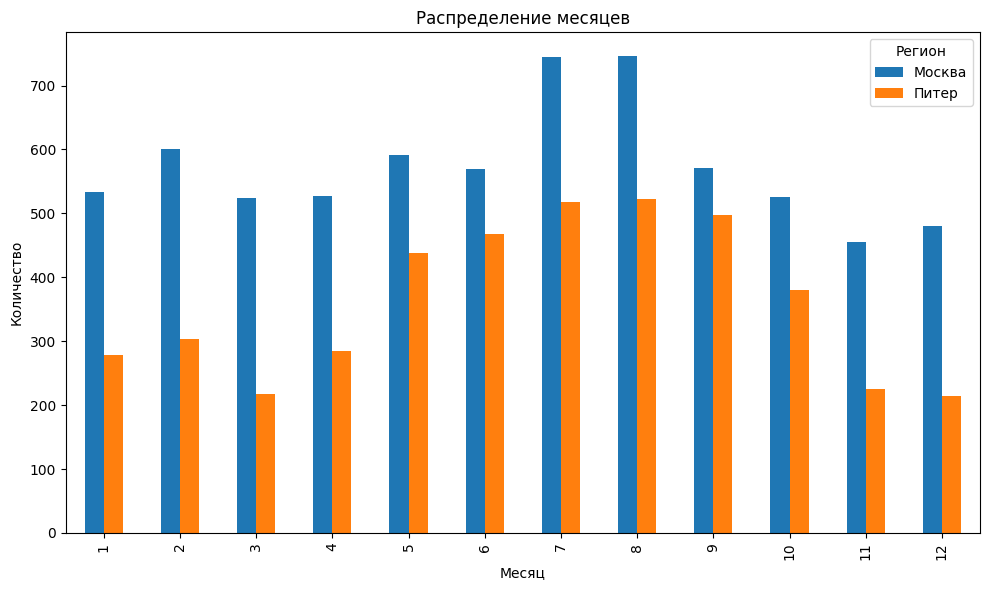

       Месяц бронирования  Регион
0                      11   Питер
1                      12   Питер
2                      11  Москва
3                       7  Москва
4                       3  Москва
...                   ...     ...
11213                   3  Москва
11214                  11  Москва
11215                   2  Москва
11216                   1  Москва
11217                   2   Питер

[11218 rows x 2 columns]


In [ ]:
grouped_data = df_test[['Регион', 'Месяц заезда']].groupby(['Регион', 'Месяц заезда']).size().reset_index(name='Количество')

pivot_table = grouped_data.pivot(index='Месяц заезда', columns='Регион', values='Количество').fillna(0)

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Распределение месяцев')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.legend(title='Регион')
plt.tight_layout()
plt.show()

print(df_test[['Месяц бронирования', 'Регион']])

# Подкатываем к тесту с эчпочмаком

In [ ]:
# Приведение категориальных данных в числовые

print(df_test.info())

for i in df_test.columns:
  if df_test[i].dtype == 'object':
    m = LabelEncoder()
    df_test[i] = m.fit_transform(df_test[i])


display(df_test)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             11218 non-null  int64         
 1   № брони                                11218 non-null  object        
 2   Номеров                                11218 non-null  int64         
 3   Стоимость                              11218 non-null  float64       
 4   Внесена предоплата                     11218 non-null  int64         
 5   Способ оплаты                          11218 non-null  object        
 6   Дата бронирования                      11218 non-null  datetime64[ns]
 7   Заезд                                  11218 non-null  datetime64[ns]
 8   Ночей                                  11218 non-null  int64         
 9   Выезд                                  11218 non-null  dateti

,Unnamed: 0,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Заезд,Ночей,Выезд,...,Год бронирования,Ключевая ставка в момент бронирования,Инфляция в момент бронирования,Дата заезда,Плохая погода МСК (для 1 и 2),Плохая погода МСК (для 3 и 4),Координаты отеля,Расстояние до метро,Расстояние до метро (евклид),Средняя ЗП
0,0,10450,1,23750.0,23750,4,2023-11-28 10:34:43,2023-11-29 15:00:00,2,2023-12-01 12:00:00,...,2023,15.0,7.42,476,0,1,3,3,0.006821,76032
1,1,5236,1,15010.0,7505,4,2022-12-12 18:30:43,2022-12-19 15:00:00,2,2022-12-21 12:00:00,...,2022,7.5,11.94,188,0,0,2,2,0.003620,76032
2,2,5166,1,8400.0,8400,11,2022-11-25 22:03:59,2022-12-11 15:00:00,1,2022-12-12 12:00:00,...,2022,7.5,11.98,333,0,0,0,0,0.008046,86494
3,3,8745,1,42500.0,42500,4,2023-07-18 15:45:46,2023-08-21 15:00:00,3,2023-08-24 12:00:00,...,2023,7.5,5.15,619,0,0,0,0,0.008046,86494
4,4,6411,1,62500.0,11900,13,2023-03-23 11:04:13,2023-03-26 15:00:00,5,2023-03-31 12:00:00,...,2023,7.5,3.51,507,0,0,0,0,0.008046,86494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,11213,1718,1,50200.0,50200,2,2022-03-27 21:30:38,2022-05-07 15:00:00,2,2022-05-09 12:00:00,...,2022,20.0,16.69,646,0,0,1,1,0.004140,86494
11214,11214,11145,1,190100.0,43500,13,2023-11-11 17:51:55,2024-02-16 15:00:00,5,2024-02-21 12:00:00,...,2023,15.0,7.42,279,0,0,0,0,0.008046,86494
11215,11215,302,1,42300.0,42300,4,2022-02-09 02:23:14,2022-02-09 15:00:00,1,2022-02-10 12:00:00,...,2022,8.5,9.15,469,0,0,0,0,0.008046,86494
11216,11216,5701,1,27900.0,27900,4,2023-01-21 09:10:17,2023-01-28 15:00:00,1,2023-01-29 12:00:00,...,2023,7.5,11.77,216,0,0,0,0,0.008046,86494


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11218 entries, 0 to 11217
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             11218 non-null  int64         
 1   № брони                                11218 non-null  int64         
 2   Номеров                                11218 non-null  int64         
 3   Стоимость                              11218 non-null  float64       
 4   Внесена предоплата                     11218 non-null  int64         
 5   Способ оплаты                          11218 non-null  int64         
 6   Дата бронирования                      11218 non-null  datetime64[ns]
 7   Заезд                                  11218 non-null  datetime64[ns]
 8   Ночей                                  11218 non-null  int64         
 9   Выезд                                  11218 non-null  dateti

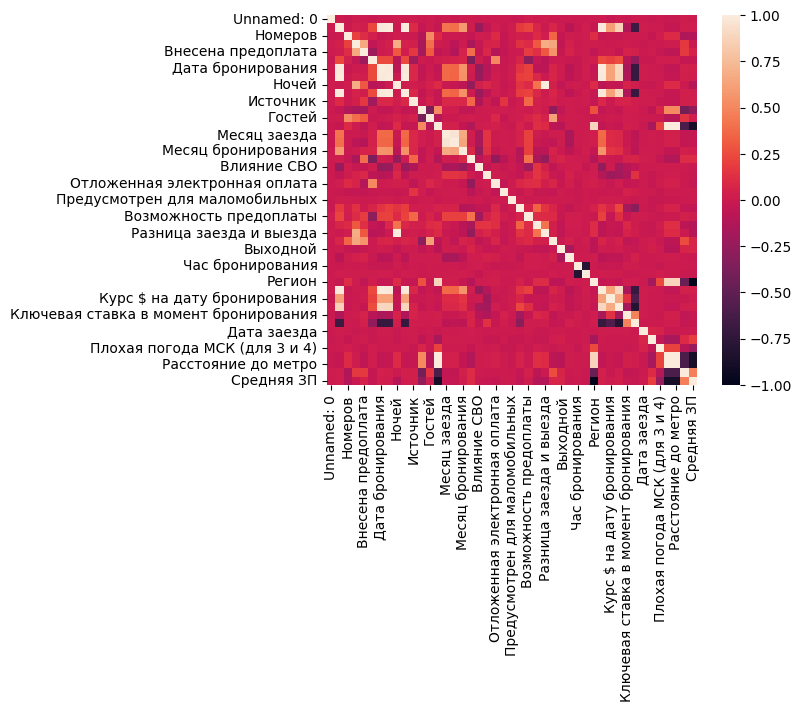

In [ ]:
# Матрица корреляции
df_test_corr = df_test.corr()

sns.heatmap(df_test_corr, square=True, fmt=".1f")
plt.show()

# Готовый файлик

In [ ]:
# Получаем признаки, которые использовались при обучении модели
train_features = best_model.feature_names_in_

# Список признаков для удаления
features_to_remove = ['Дата', 'Инцидент', 'Плохая погода СПБ (для 1 и 2)', 'Плохая погода СПБ (для 3 и 4)']

# Удаляем только те признаки, которые существуют в df_test
df_test = df_test.drop(columns=[col for col in features_to_remove if col in df_test.columns])

# Добавляем недостающие признаки с нулями
missing_cols = [col for col in train_features if col not in df_test.columns]

df_test = df_test[train_features]

# Преобразуем столбцы с датами в числовой формат (например, количество секунд с начала эпохи)
for col in df_test.select_dtypes(include=['datetime64']).columns:
    df_test[col] = df_test[col].apply(lambda x: x.timestamp() if pd.notna(x) else 0)

# Выполняем предсказание на тестовом наборе
y_pred = best_model.predict(df_test)

# Сохраняем результат предсказаний в CSV файл
pd.DataFrame(y_pred).to_csv('проверочка_сигме_fin.csv', index=False)
